In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

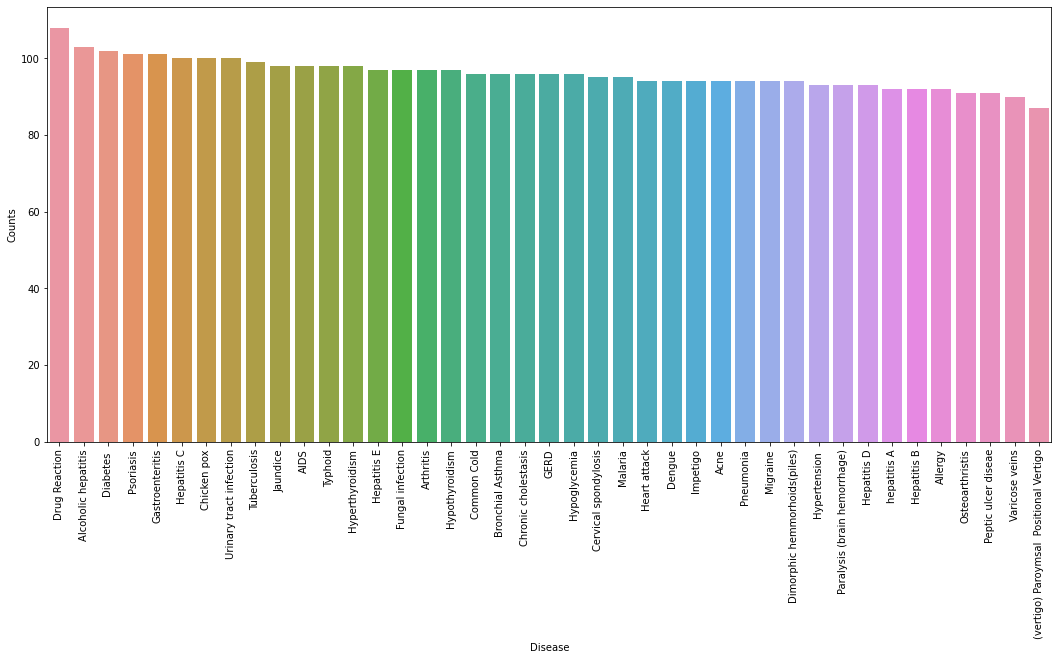

In [2]:
#checking test data_set is balanced or not
data = pd.read_csv("train.csv")
disease_counts = data["Disease"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})
plt.figure(figsize = (18,8))
sns.barplot(x="Disease", y="Counts", data=temp_df)
plt.xticks(rotation=90)
plt.show()

In [11]:
data= pd.read_csv("train.csv")
#data.dropna["Unnamed:0"]
data = data.iloc[:, ~data.columns.str.contains('^Unnamed')]
data.head()

,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,...,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Disease
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypoglycemia
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypoglycemia
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Tuberculosis


In [12]:
data.describe()

,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,...,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,3936.000000,3936.000000,3936.000000,3936.000000,3936.000000,3936.000000,3936.000000,3936.000000,3936.000000,3936.000000,...,3936.000000,3936.000000,3936.000000,3936.000000,3936.000000,3936.000000,3936.000000,3936.000000,3936.000000,3936.000000
mean,0.142022,0.164634,0.022104,0.022358,0.043699,0.021341,0.161585,0.021087,0.048018,0.044461,...,0.024390,0.021596,0.024644,0.024898,0.024390,0.024136,0.024390,0.022612,0.023374,0.022612
std,0.349117,0.370897,0.147039,0.147863,0.204451,0.144538,0.368117,0.143694,0.213832,0.206144,...,0.154277,0.145377,0.155058,0.155835,0.154277,0.153491,0.154277,0.148681,0.151107,0.148681
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
#data.isna().sum()
occurence = []
symptoms = pd.read_csv("Symptoms.csv")
symptoms.iloc[:,:-1]
symptoms.head()

,Unnamed: 0,Symptom
0,0,itching
1,1,skin_rash
2,2,nodal_skin_eruptions
3,3,dischromic _patches
4,4,continuous_sneezing


In [33]:
for i in symptoms["Symptom"]:
    count = 0
    for x in data[i]:
        if x==1:
            count=count+1
    occurence.append(count)

#occurence.pop()
#symptoms.pop()
print(occurence)


[559, 648, 87, 88, 172, 84, 636, 83, 189, 175, 89, 1527, 452, 554, 732, 903, 919, 822, 652, 187, 97, 87, 86, 169, 90, 93, 1098, 86, 1554, 379, 190, 372, 96, 276, 182, 374, 102, 102, 90, 91, 454, 357, 186, 92, 895, 263, 263, 88, 180, 185, 382, 89, 180, 87, 180, 83, 87, 445, 540, 371, 287, 285, 561, 189, 536, 94, 184, 94, 93, 88, 92, 92, 97, 97, 93, 98, 98, 98, 97, 284, 99, 96, 96, 96, 96, 96, 96, 187, 94, 88, 89, 91, 91, 86, 85, 86, 82, 85, 93, 93, 183, 92, 97, 97, 97, 195, 191, 91, 96, 96, 90, 86, 87, 179, 180, 92, 79, 83, 84, 83, 85, 96, 85, 97, 98, 96, 95, 96, 89, 92, 89, 0]


In [39]:
sym=[]
for i in symptoms["Symptom"]:
    sym.append(i)
print(len(occurence))
print(len(symptoms))


132
132


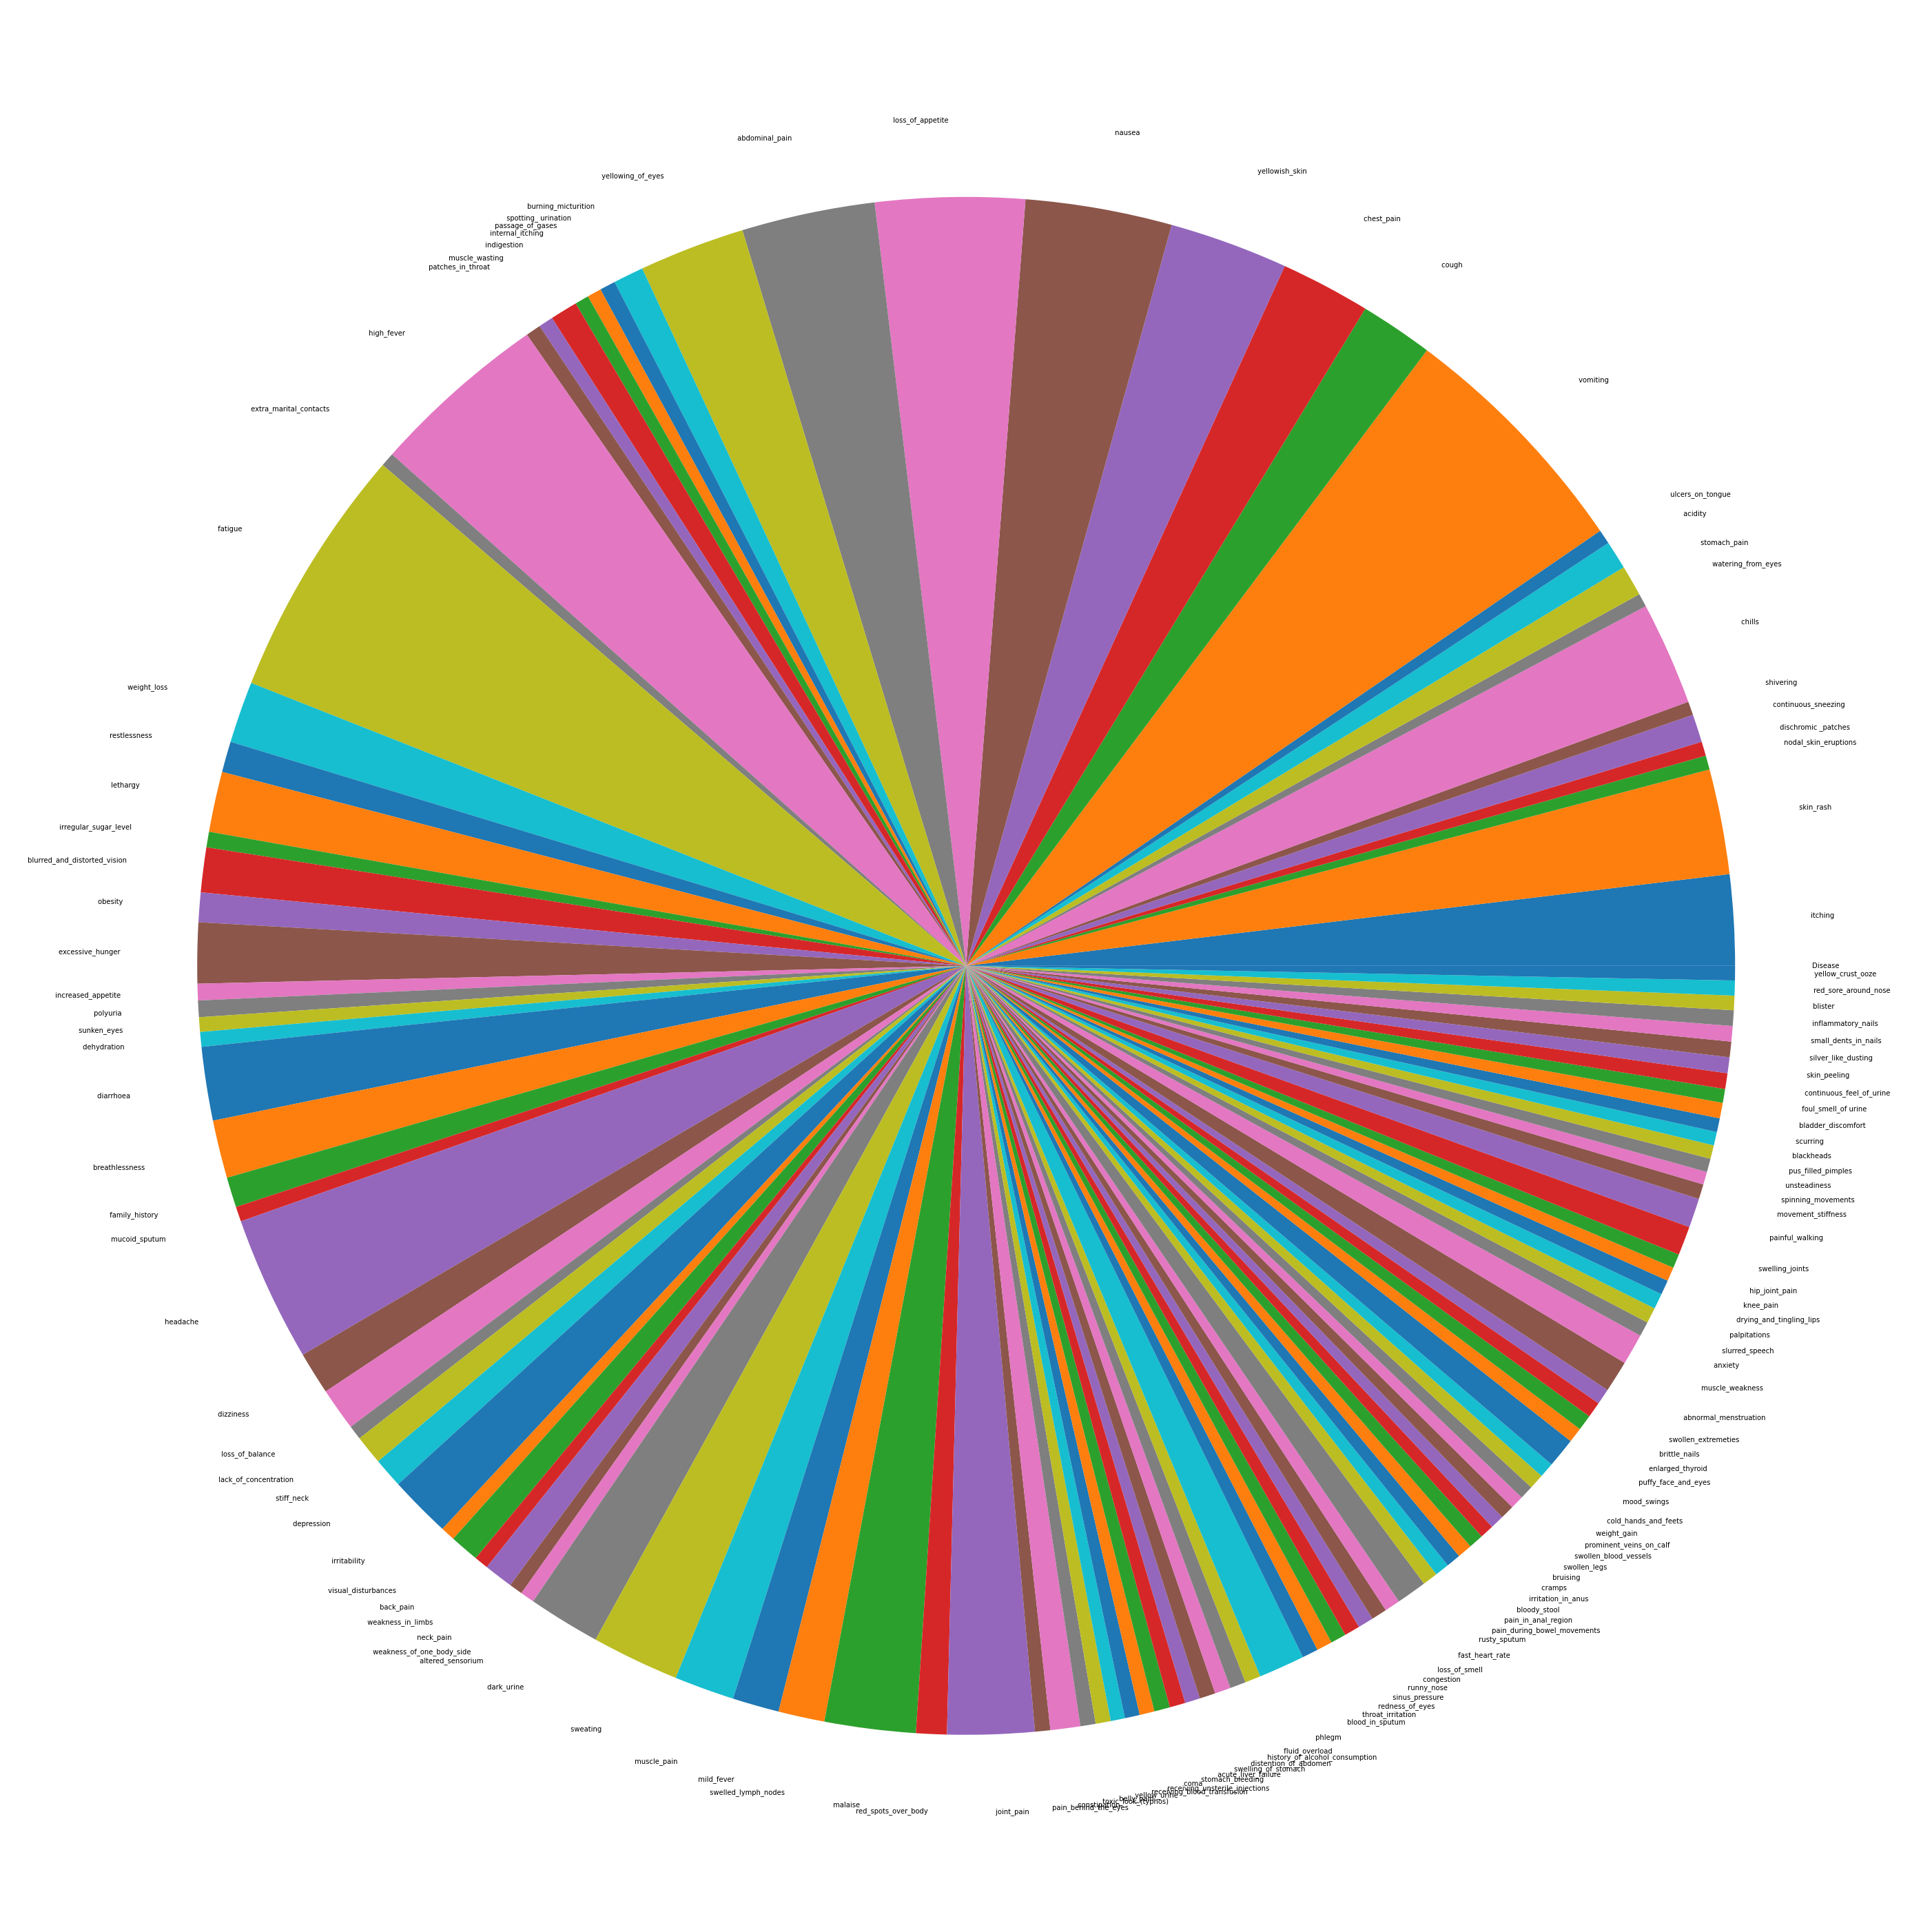

In [49]:
fig = plt.figure(figsize=(50,60))
plt.pie(occurence, labels=sym)
#print(len(occurence))
#print(len(symptoms))
plt.show()